In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from time import time
import seaborn as sns
pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv('Project.csv')

In [3]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,66624733,NaN,18000,18000,18000,60 months,19.48,471.70,E,E2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,67849662,NaN,4225,4225,4225,36 months,14.85,146.16,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,67715283,NaN,16000,16000,16000,36 months,12.88,538.18,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,68341789,NaN,24250,24250,24250,60 months,24.24,701.01,F,F3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68415473,NaN,25000,25000,25000,60 months,13.99,581.58,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3749,67828672,NaN,5000,5000,5000,36 months,13.67,170.09,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3750,67878307,NaN,16000,16000,16000,36 months,9.76,514.48,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3751,66504719,NaN,24000,24000,23950,60 months,13.18,548.29,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3752,68038592,NaN,10000,10000,10000,36 months,9.17,318.79,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


Cleaning the dataset to remove NaNs

In [4]:
data = data.dropna(axis = 1, how='any')

Summary stats of data

In [5]:
data.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.754000e+03,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,...,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3.754000e+03,3754.000000,3754.000000,3754.00000
mean,6.785033e+07,15216.002930,15216.002930,15210.641982,13.149395,442.945346,75587.305887,20.498988,0.352158,692.222962,...,0.001332,0.089771,2.456313,93.984283,0.145178,0.074853,1.670815e+05,54281.806340,21903.970698,46959.67155
std,1.757969e+06,8630.219228,8630.219228,8626.360628,4.449048,247.735942,49550.323900,18.292300,0.926624,29.840925,...,0.036476,0.492076,2.066915,8.619202,0.403778,0.554988,1.611681e+05,49213.423433,22788.062646,45242.01217
min,8.497950e+05,1000.000000,1000.000000,1000.000000,5.320000,30.540000,1770.000000,0.000000,0.000000,660.000000,...,0.000000,0.000000,0.000000,35.000000,0.000000,0.000000,2.700000e+03,0.000000,0.000000,0.00000
25%,6.780992e+07,8375.000000,8375.000000,8356.250000,9.760000,260.550000,47000.000000,13.390000,0.000000,670.000000,...,0.000000,0.000000,1.000000,90.900000,0.000000,0.000000,5.100300e+04,24178.750000,7700.000000,18000.00000
50%,6.792901e+07,14250.000000,14250.000000,14250.000000,12.590000,388.260000,65000.000000,19.820000,0.000000,685.000000,...,0.000000,0.000000,2.000000,97.200000,0.000000,0.000000,1.083450e+05,41629.000000,15100.000000,35661.00000
75%,6.816230e+07,20337.500000,20337.500000,20337.500000,16.550000,577.440000,90000.000000,26.850000,0.000000,705.000000,...,0.000000,0.000000,3.000000,100.000000,0.000000,0.000000,2.432025e+05,68688.750000,27900.000000,62809.75000
max,6.861639e+07,35000.000000,35000.000000,35000.000000,28.990000,1282.790000,1000000.000000,999.000000,11.000000,840.000000,...,1.000000,11.000000,25.000000,100.000000,6.000000,22.000000,1.585696e+06,644495.000000,269600.000000,462509.00000


## Question 1

Average Loan Amount

In [6]:
print("The average loan amount in the dataset is:", round(data['loan_amnt'].mean(),2))

The average loan amount in the dataset is: 15216.0


Median Interest Rate

In [7]:
print("The median interest rate in the dataset is:", data['int_rate'].median())

The median interest rate in the dataset is: 12.59


75th Percentile of Annual Income

In [8]:
print("The 75th percentile of annual income in the dataset is:", data['annual_inc'].quantile(0.75))

The 75th percentile of annual income in the dataset is: 90000.0


## Question 2

Bar plot representing the number of observations for each loan status category

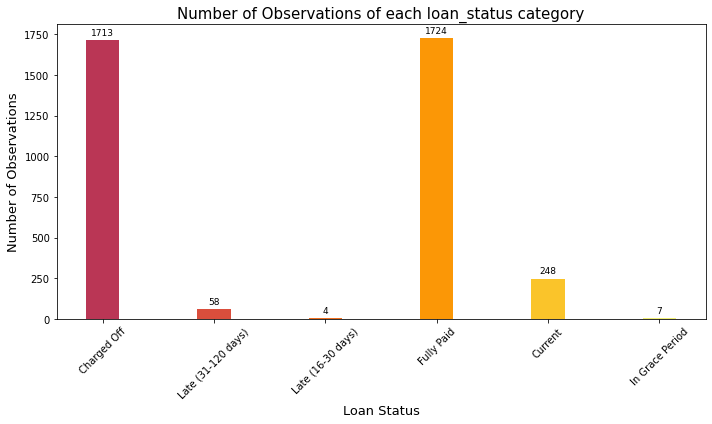

In [9]:
loanStatuses = list(data['loan_status'].unique())
counts = []

for status in loanStatuses:
    count = len(data[data['loan_status'] == status])
    counts.append(count)
    
plt.figure(figsize=(10,6))
width = 0.3

colors = cm.inferno_r(np.linspace(.5, .05, 6))

bar1 = plt.bar(loanStatuses, counts, width, color = colors)

plt.xlabel('Loan Status', fontsize = 13)
plt.ylabel('Number of Observations', fontsize = 13)
plt.title('Number of Observations of each loan_status category', fontsize = 15)
plt.xticks(rotation = 45)
plt.bar_label(bar1, padding=3, fontsize=9)

plt.tight_layout()
plt.show()

Combining categories in loan_status into two according to given criteria

In [10]:
# Storing the conditions in a list
conditions = [(data['loan_status'] == 'Charged Off') | (data['loan_status'] == 'Late (16-30 days)') |
              (data['loan_status'] == 'Late (31-120 days)'),
              (data['loan_status'] == 'Fully Paid') | (data['loan_status'] == 'Current') |
              (data['loan_status'] == 'In Grace Period')]

# Storing the new categories corresponding to the previous list
values = ['Default', 'Fully Paid']

# Creating a new column based on the above given condition and values
data['new_loan_status'] = np.select(conditions, values)

Bar plot representing the new number of observations for the new_loan_status category

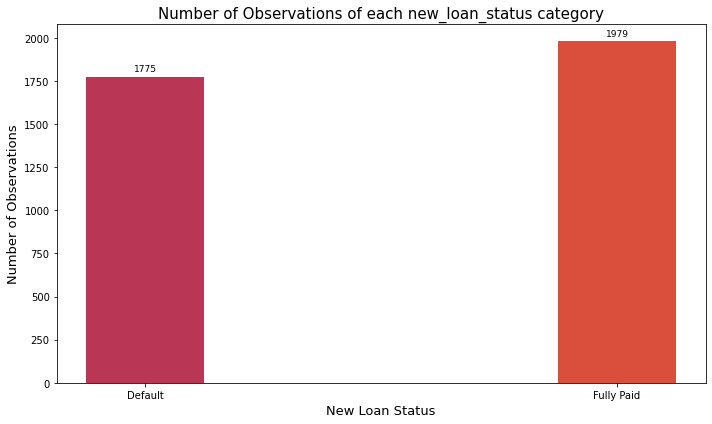

In [11]:
newLoanStatuses = list(data['new_loan_status'].unique())
counts = []

for status in newLoanStatuses:
    count = len(data[data['new_loan_status'] == status])
    counts.append(count)
    
plt.figure(figsize=(10,6))
width = 0.25

colors = cm.inferno_r(np.linspace(.5, .05, 6))

bar1 = plt.bar(newLoanStatuses, counts, width, color = colors)

plt.xlabel('New Loan Status', fontsize = 13)
plt.ylabel('Number of Observations', fontsize = 13)
plt.title('Number of Observations of each new_loan_status category', fontsize = 15)
plt.xticks()
plt.bar_label(bar1, padding=3, fontsize=9)

plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'New Loan Status Category based on the Grades')]

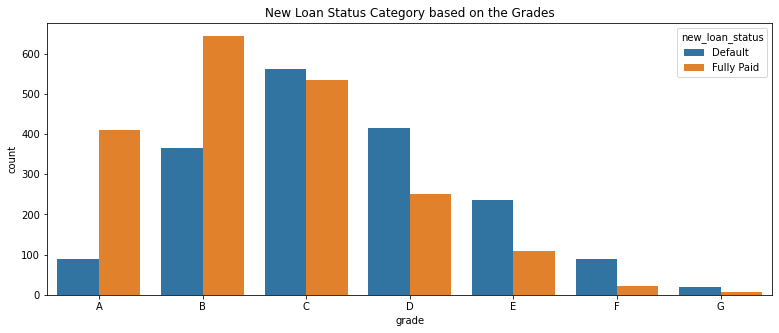

In [12]:
grade = sorted(data.grade.unique().tolist())
plt.figure(figsize = (13,5))
sns.countplot(x='grade', data=data, hue='new_loan_status', order=grade).set(
    title='New Loan Status Category based on the Grades')

## Question 3

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
import seaborn as sn

In [14]:
# Extracting only the required variables for machine learning models

modelData = data[['new_loan_status','loan_amnt','funded_amnt', 'int_rate','annual_inc', 'dti', 'delinq_2yrs',
                  'fico_range_low', 'inq_last_6mths', 'open_acc', 'revol_bal']]

In [15]:
modelData

,new_loan_status,loan_amnt,funded_amnt,int_rate,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,revol_bal
0,Default,18000,18000,19.48,150000.0,9.39,0,665,1,18,14052
1,Default,4225,4225,14.85,35000.0,15.22,2,725,0,6,1058
2,Default,16000,16000,12.88,65000.0,18.96,0,675,0,7,5157
3,Default,24250,24250,24.24,75000.0,20.84,0,660,0,18,24799
4,Default,25000,25000,13.99,79000.0,34.53,0,730,1,33,22519
...,...,...,...,...,...,...,...,...,...,...,...
3749,Default,5000,5000,13.67,38000.0,29.63,0,660,2,30,9654
3750,Fully Paid,16000,16000,9.76,100000.0,8.32,1,670,0,6,14634
3751,Fully Paid,24000,24000,13.18,80000.0,22.80,1,675,0,15,24929
3752,Fully Paid,10000,10000,9.17,45000.0,3.84,0,685,1,10,6744


In [16]:
# Extracting the predictive variables
X = modelData[['loan_amnt','funded_amnt', 'int_rate','annual_inc', 'dti', 'delinq_2yrs',
                  'fico_range_low', 'inq_last_6mths', 'open_acc', 'revol_bal']]

# Extracting only the prediction variable
y = modelData['new_loan_status']

# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('The shape of training features is:', X_train.shape)
print('The shape of testing features is:', X_test.shape)

The shape of training features is: (3003, 10)
The shape of testing features is: (751, 10)


Machine Learning Model 1 : **Logistic Regression**

In [17]:
logisticRegression = LogisticRegression()
t1 = time()
logisticRegression.fit(X_train, y_train)
y_pred = logisticRegression.predict(X_test)
t2 = time()
print('Overall accuracy of Logistic Regression is:', round(metrics.accuracy_score(y_test, y_pred)*100,2), '%')
print('F1 Score of Logistic Regression is:', round(f1_score(y_test, y_pred, pos_label = "Fully Paid"),3))
print('Time taken for running:', round(t2-t1,3))

Overall accuracy of Logistic Regression is: 66.31 %
F1 Score of Logistic Regression is: 0.701
Time taken for running: 0.11


Machine Learning Model 2 : **Decision Trees**

In [18]:
decisionTrees = DecisionTreeClassifier(max_depth = 2)
t1 = time()
decisionTrees.fit(X_train, y_train)
y_pred = decisionTrees.predict(X_test)
t2 = time()
print('Overall accuracy of Decision Tree Classifier is:', round(metrics.accuracy_score(y_test, y_pred)*100,2), '%')
print('F1 Score of Decision Tree Classifier is:', round(f1_score(y_test, y_pred, pos_label = "Fully Paid"),3))
print('Time taken for running:', round(t2-t1,3))

Overall accuracy of Decision Tree Classifier is: 66.71 %
F1 Score of Decision Tree Classifier is: 0.674
Time taken for running: 0.012


Machine Learning Model 3 : **KNN**

In [19]:
KNN = KNeighborsClassifier(n_neighbors = 5)
t1 = time()
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
t2 = time()
print('Overall accuracy of KNN model is:', round(metrics.accuracy_score(y_test, y_pred)*100,2), '%')
print('F1 Score of KNN is:', round(f1_score(y_test, y_pred, pos_label = "Fully Paid"),3))
print('Time taken for running:', round(t2-t1,3))

Overall accuracy of KNN model is: 53.79 %
F1 Score of KNN is: 0.548
Time taken for running: 0.052


Machine Learning Model 4 : **SVM**

In [20]:
SVM = svm.SVC()
t1 = time()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
t2 = time()
print('Overall accuracy of SVM model is:', round(metrics.accuracy_score(y_test, y_pred)*100,2), '%')
print('F1 Score of SVM Model is:', round(f1_score(y_test, y_pred, pos_label = "Fully Paid"),3))
print('Time taken for running:', round(t2-t1,3))

Overall accuracy of SVM model is: 57.79 %
F1 Score of SVM Model is: 0.655
Time taken for running: 1.044


Machine Learning Model 5 : **Neural Network**

In [21]:
neuralNetworkMLP = MLPClassifier()
t1 = time()
neuralNetworkMLP.fit(X_train, y_train)
y_pred = neuralNetworkMLP.predict(X_test)
t2 = time()
print('Overall accuracy of Neural Network is:', round(metrics.accuracy_score(y_test, y_pred)*100,2), '%')
print('F1 Score of Neural Network is is:', round(f1_score(y_test, y_pred, pos_label = "Fully Paid"),3))
print('Time taken for running:', round(t2-t1,3))

Overall accuracy of Neural Network is: 49.0 %
F1 Score of Neural Network is is: 0.02
Time taken for running: 0.74


We can see the overall accuracies, F1 score, and time taken for model to run in the above cells. It is clear that the best of all the machine learning models is Logistic Regression and Decision Trees. Both of these models have similar accuracies but if we talk about the performance, then it is clear that Decision Trees works way faster, with **0.016 seconds**, than Logistic Regression with **0.096 seconds**. And in terms of per class accuracy (the f1-score), the Logistic Regression outperforms the Decision Trees. Hence, we can conclude that these two machine learning models works perfectly for our dataset, but the Decision Trees works the best.

The reason for this is that the Decision Trees works best with the categorical data, and since our dataset contains the categorical classification, therefore it gives the best performance both in terms of accuracy and time. As the Decision Trees can create many thousands of trees with increased depth level, resulting in learning almost all the training data with all the possible combinations.

## Question 4

In [22]:
KNN = KNeighborsClassifier(n_neighbors = 1)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print('Overall accuracy of KNN model with 1 neighbors is:', round(metrics.accuracy_score(y_test, y_pred)*100,2), '%')

KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print('Overall accuracy of KNN model with 3 neighbors is:', round(metrics.accuracy_score(y_test, y_pred)*100,2), '%')

KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print('Overall accuracy of KNN model with 5 neighbors is:', round(metrics.accuracy_score(y_test, y_pred)*100,2), '%')

KNN = KNeighborsClassifier(n_neighbors = 7)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print('Overall accuracy of KNN model with 7 neighbors is:', round(metrics.accuracy_score(y_test, y_pred)*100,2), '%')

KNN = KNeighborsClassifier(n_neighbors = 9)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print('Overall accuracy of KNN model with 9 neighbors is:', round(metrics.accuracy_score(y_test, y_pred)*100,2), '%')

KNN = KNeighborsClassifier(n_neighbors = 10)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print('Overall accuracy of KNN model with 10 neighbors is:', round(metrics.accuracy_score(y_test, y_pred)*100,2), '%')

Overall accuracy of KNN model with 1 neighbors is: 53.26 %
Overall accuracy of KNN model with 3 neighbors is: 52.86 %
Overall accuracy of KNN model with 5 neighbors is: 53.79 %
Overall accuracy of KNN model with 7 neighbors is: 54.06 %
Overall accuracy of KNN model with 9 neighbors is: 56.86 %
Overall accuracy of KNN model with 10 neighbors is: 55.79 %


The KNN works by finding out the Eucliean distance between the data sample and every other sample using some mathematical equations, then assigning the class based on voting for the most frequent class labels.

From the above cell output, we can see that the accuracy of the KNN model increases by increasing the number of neighbors parameters in the model. But it increases upto a certain point **(Neighbors = 9)**, and then it decreases for the next increment in the neighbor **(Neighbors = 10)**. This is the optimal number of nearest neighbors, which in this case is 9, with an accuracy of **56.86%**.

## Question 5

In [23]:
randomForest = RandomForestClassifier()
t1 = time()
randomForest.fit(X_train, y_train)
y_pred = randomForest.predict(X_test)
t2 = time()
print('Overall accuracy of Random Forest is:', round(metrics.accuracy_score(y_test, y_pred)*100,2), '%')
print('F1 Score of Random Forest is is:', round(f1_score(y_test, y_pred, pos_label = "Fully Paid"),3))
print('Time taken for running:', round(t2-t1,3))

Overall accuracy of Random Forest is: 72.57 %
F1 Score of Random Forest is is: 0.736
Time taken for running: 0.878


The Random Forest outperforms all the machine learning models with the highest accuracy i.e. **71.24%** in case of our dataset. Since the Random Forest model comprises of several Decision Trees, therefore it has better accuracy, although the Random Forest takes longer time to train than the Decision Trees as can be seen from the output above.